In [1]:
library(dplyr)
library(data.table)
library(ggpmisc)
#BiocManager::install("gagneurlab/OUTRIDER", ref="outrider2",force = TRUE)
library(OUTRIDER)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘data.table’


Die folgenden Objekte sind maskiert von ‘package:dplyr’:

    between, first, last


Lade nötiges Paket: ggpp

Lade nötiges Paket: ggplot2


Attache Paket: ‘ggpp’


Das folgende Objekt ist maskiert ‘package:ggplot2’:

    annotate


Lade nötiges Paket: BiocParallel

Lade nötiges Paket: GenomicFeatures

Lade nötiges Paket: BiocGenerics


Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:dplyr’:

    combine, intersect, setdiff, union


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, e

In [2]:
# extract protein intensity
dat <- fread("proteinGroups.txt")
prot_int <- as.data.frame(dat[,327:386])

In [3]:
samples <- sub("Intensity ", "", colnames(dat)[327:386])
colnames(prot_int) <- samples
rownames(prot_int) <- dat$`Protein IDs`

In [4]:
write.table(prot_int, "prot_int.csv")

In [5]:
prot_int <- read.table("prot_int.csv")
dim(prot_int)
head(prot_int)

[1] 10825    60

,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,3812400,32150000,6094400,4313900,0,47658000,5785500,64889000,33141000,30032000,⋯,18067000,60596000,7556500,8213600,48755000,161350000,0,54603000,48719000,14605000
A0A0B4J2F0,0,0,0,0,0,0,0,0,0,6635200,⋯,0,0,0,0,0,0,0,0,0,0
A0A0C4DH73,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A0A5B9;P01850,0,0,0,0,0,0,234380000,0,7342300,0,⋯,0,0,5834700,0,0,0,0,10133000,0,35631000
A0AV96;A0AV96-2,73467000,567040000,490700000,1056000000,23231000,242810000,21620000,3138100000,108070000,1439200000,⋯,81147000,21566000,11199000,513940000,857760000,1651300000,470600000,40020000,106450000,0
A0AVF1;A0AVF1-2;A0AVF1-3,6052600,54431000,24653000,52919000,15826000,0,17568000,18730000,9006900,12765000,⋯,75090000,46642000,0,70986000,20219000,62485000,13611000,29807000,53550000,114360000


In [6]:
# missing values due to missing detection in the mass-spectrometry must be declared as such, 
# e.g. NAN and must not be kept 0, as this will be considered as true value.
prot_int[prot_int==0] <- NA

outrider_ds <- Outrider2DataSet(inputData=prot_int, profile="protrider")

# filter out features that are not variable across samples or have many NAs
outrider_ds <- filterExpression(outrider_ds)


260 features did not pass the filter due to no variability across samples. This is 2.4% of the features.

3590 features are filtered out. This is 34% of the features.



In [7]:
outrider_ds 

class: Outrider2DataSet
class: RangedSummarizedExperiment 
dim: 6975 60 
metadata(1): version
assays(1): observed
rownames(6975): P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
  A0AV96;A0AV96-2 ...
  REV__Q9UL68-2;REV__Q9UL68-4;REV__Q9UL68;REV__Q9UL68-3
  REV__Q9UMY1-2;REV__Q9UMY1
rowData names(4): passedFilter passedVariableFeatureFilter
  passedPercentileFilter passedNAFilter
colnames(60): X786O_NCI60 A498_NCI60 ... UACC257_NCI60 UACC62_NCI60
colData names(6): sampleID expressedFeatures ... passedFilterFeatures
  expressedFeaturesRank
------------------- Model parameters -------------------
Profile:                   protrider 
Default distribution:      gaussian 


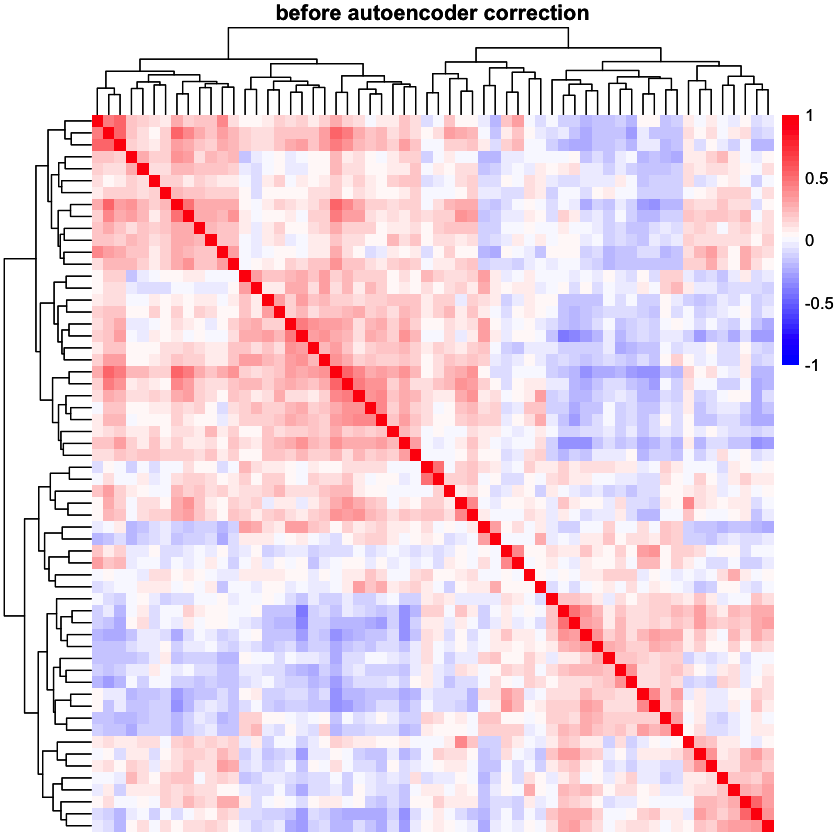

In [8]:
# visualize the correlations between samples through heatmap
# In most RNA-seq experiments correlations between the samples can be observed. 
# These are often due to technical confounders (e.g. sequencing batch) or biological confounders (e.g. sex, age). 
# These confounders can adversely affect the detection of aberrant features. 
plotCountCorHeatmap(outrider_ds, normalized=FALSE, nRowCluster=NA, nColCluster=NA, main="before autoencoder correction")

In [9]:
reticulate::use_condaenv("py_outrider1", conda="/opt/homebrew/bin/conda")
# according to the result before, the optimal result is encod_dim 17, noise factor 1
# here to save time, we only run q = 17
outrider_ds <- OUTRIDER(outrider_ds, q=17)

Thu Feb  9 10:47:34 2023: Preprocessing ...

	Thu Feb  9 10:47:34 2023:  Applying preprocessing function ...

	Thu Feb  9 10:47:34 2023: SizeFactor estimation ...

Thu Feb  9 10:47:35 2023: Controlling for confounders ...

Using specified q = 17

Thu Feb  9 10:47:35 2023: Using the python autoencoder implementation for controlling.

Connecting to the py_outrider python package using reticulate (useBasilisk = FALSE)... 
In case of errors, please make sure to specify the right python binary when loading R.
If you rather want us to automatically setup a conda environment with 'py_outrider'
installed using the 'basilisk' package, please use the argument 'useBasilisk = TRUE'.

Thu Feb  9 11:06:04 2023: Used the python autoencoder implementation for controlling.

Thu Feb  9 11:06:04 2023: P-value calculation ...

Thu Feb  9 11:06:04 2023: Fold-change / zScore / delta calculation ...



In [10]:
results(outrider_ds)

featureID,sampleID,pValue,padjust,zScore,fc,log2fc,input_value,preprocessed_raw,preprocessed_expected,normalized,meanCorrected,sd,sizefactor,pvalDistribution,aberrant,AberrantBySample,AberrantByFeature,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>
P98175-2;P98175,SN12C_NCI60,3.582025e-10,2.244320e-05,-6.27,0.85,-0.24,17657000,24.07,28.43,25.35,29.82,1.20,1.00,gaussian,TRUE,4,1,1.0
Q96JM3,DU145_NCI60,4.589631e-10,2.898043e-05,-6.23,0.81,-0.30,7064000,22.75,27.93,23.55,28.80,1.34,0.99,gaussian,TRUE,7,1,1.0
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15_NCI60,1.240254e-09,7.842967e-05,-6.08,0.82,-0.29,50830000,25.60,31.20,25.97,31.56,1.34,1.02,gaussian,TRUE,8,1,1.0
Q16778;P06899,HL60_NCI60,2.462365e-09,1.544331e-04,-5.96,0.88,-0.18,241780000,27.85,31.50,28.70,32.40,1.07,1.00,gaussian,TRUE,6,1,1.0
Q9Y263,SKMEL5_NCI60,2.647038e-09,1.652732e-04,-5.95,0.75,-0.41,1864200,20.83,27.64,22.93,30.27,1.92,1.01,gaussian,TRUE,2,1,1.0
P24928;P24928-2,U031_NCI60,2.089773e-08,6.533725e-04,5.60,1.06,0.08,4244200000,31.98,30.26,32.37,30.67,0.55,0.99,gaussian,TRUE,3,1,1.5
Q8WVV9-4;Q8WVV9;Q8WVV9-5;Q8WVV9-3,U031_NCI60,1.486014e-08,6.533725e-04,-5.66,0.90,-0.16,32726000,24.96,27.89,26.75,29.86,1.16,0.99,gaussian,TRUE,3,1,1.5
Q9ULC4;Q9ULC4-3;Q9ULC4-2,LOXIMVI_NCI60,1.082489e-08,6.767729e-04,-5.72,0.89,-0.17,59420000,25.82,29.10,26.59,29.92,1.02,1.02,gaussian,TRUE,2,1,1.0
P28838-2;P28838,EKVX_NCI60,1.290217e-08,8.213905e-04,-5.69,0.86,-0.22,83719000,26.32,30.70,27.40,31.93,1.27,1.01,gaussian,TRUE,1,1,1.0


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 31 rows containing missing values (`geom_bar()`).”


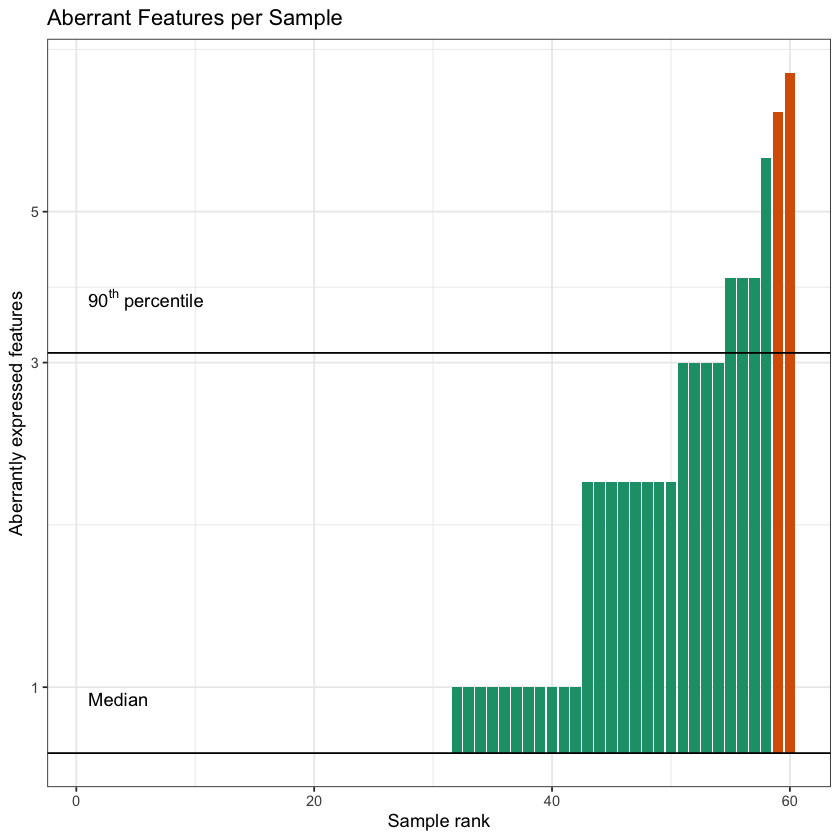

In [11]:
# One quantity of interest is the number of aberrantly expressed proteins per sample. 
# This can be displayed using the plotting function plotAberrantPerSample. 
# Alternatively, the function aberrant can be used to identify aberrant events, 
# which can be summed by sample or protein using the paramter by. 
# numbers depend on the cutoffs, which can be specified in both functions (padjCutoff and zScoreCutoff).
plotAberrantPerSample(outrider_ds, padjCutoff=0.05)

In [12]:
outrider_ds

class: Outrider2DataSet
class: RangedSummarizedExperiment 
dim: 6975 60 
metadata(7): version prepro_options ... D pvalDistribution
assays(8): observed preprocessed ... l2fc zScore
rownames(6975): P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
  A0AV96;A0AV96-2 ...
  REV__Q9UL68-2;REV__Q9UL68-4;REV__Q9UL68;REV__Q9UL68-3
  REV__Q9UMY1-2;REV__Q9UMY1
rowData names(7): passedFilter passedVariableFeatureFilter ...
  expectedLogGeomMean b
colnames(60): X786O_NCI60 A498_NCI60 ... UACC257_NCI60 UACC62_NCI60
colData names(7): sampleID expressedFeatures ... expressedFeaturesRank
  sizeFactor
------------------- Model parameters -------------------
Profile:                   protrider 
Default distribution:      gaussian 


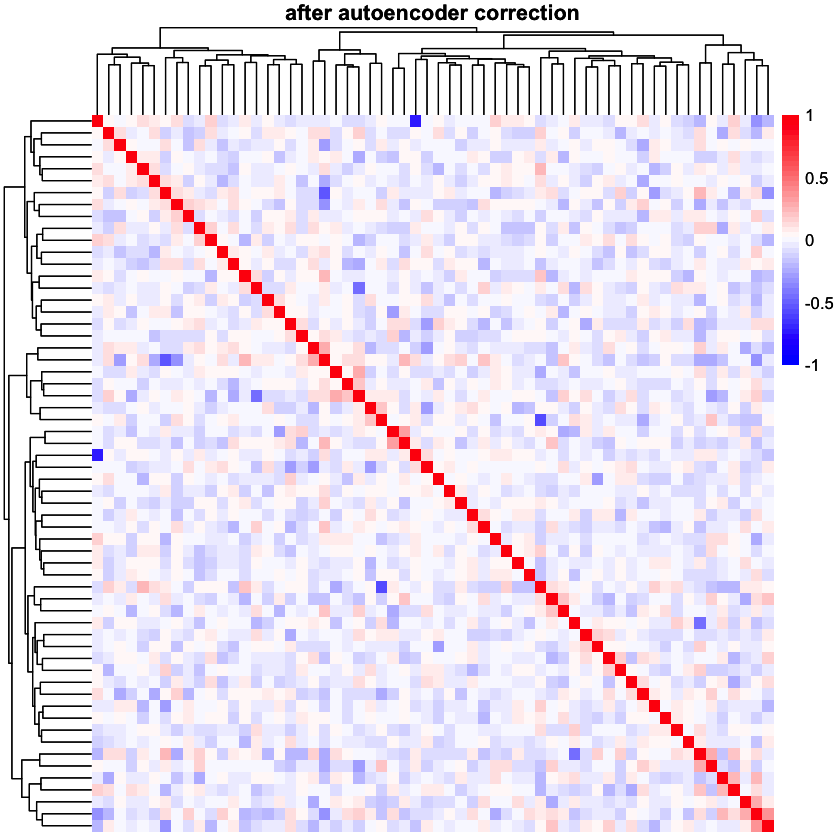

In [13]:
plotCountCorHeatmap(outrider_ds, normalized = TRUE, nRowCluster=NA, nColCluster=NA, main="after autoencoder correction" )

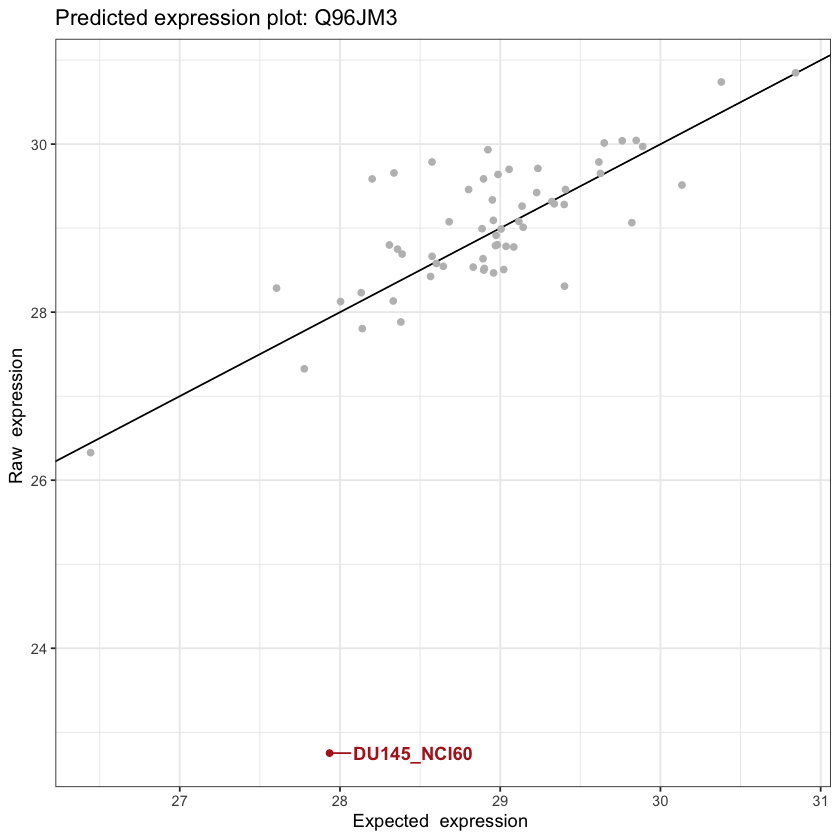

In [14]:
# Observed versus expected protein expression
# Since we do test how fare the observed count is away from the exprected expression level, 
# it is also helpful to visualize the predictions against the observed counts.
plotExpectedVsObserved(outrider_ds, "Q96JM3", basePlot=TRUE)

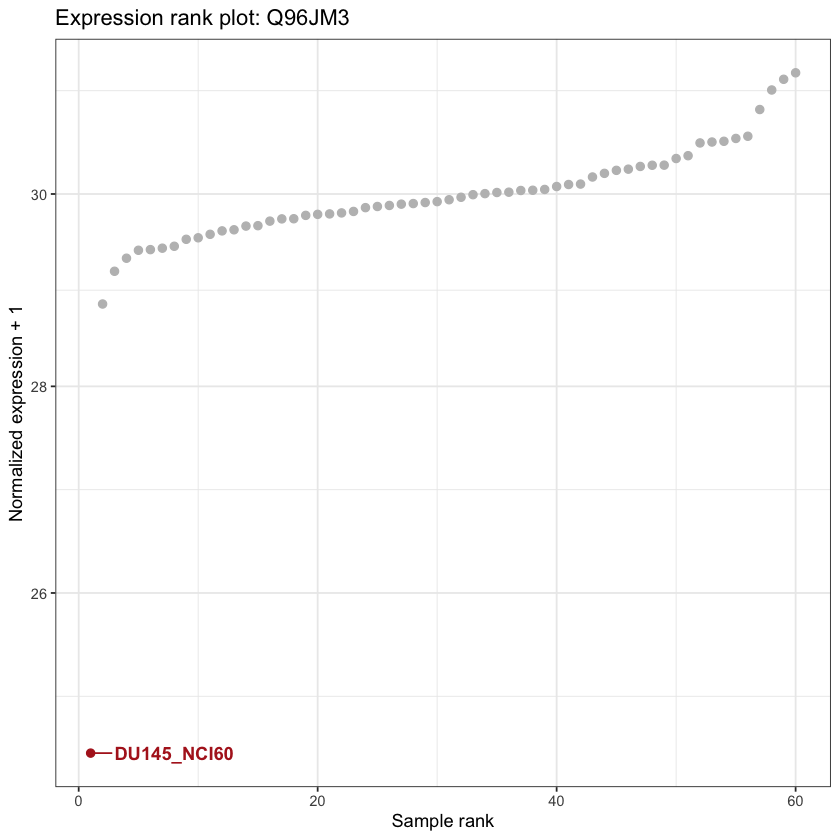

In [15]:
# expression rank of a protein with outlier events
# plotExpressionRank plots the counts in ascending order. 
# By default, the controlled counts are plotted. 
# To plot raw counts, the argument normalized can be set to FALSE.
plotExpressionRank(outrider_ds, "Q96JM3", basePlot=TRUE)

Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”


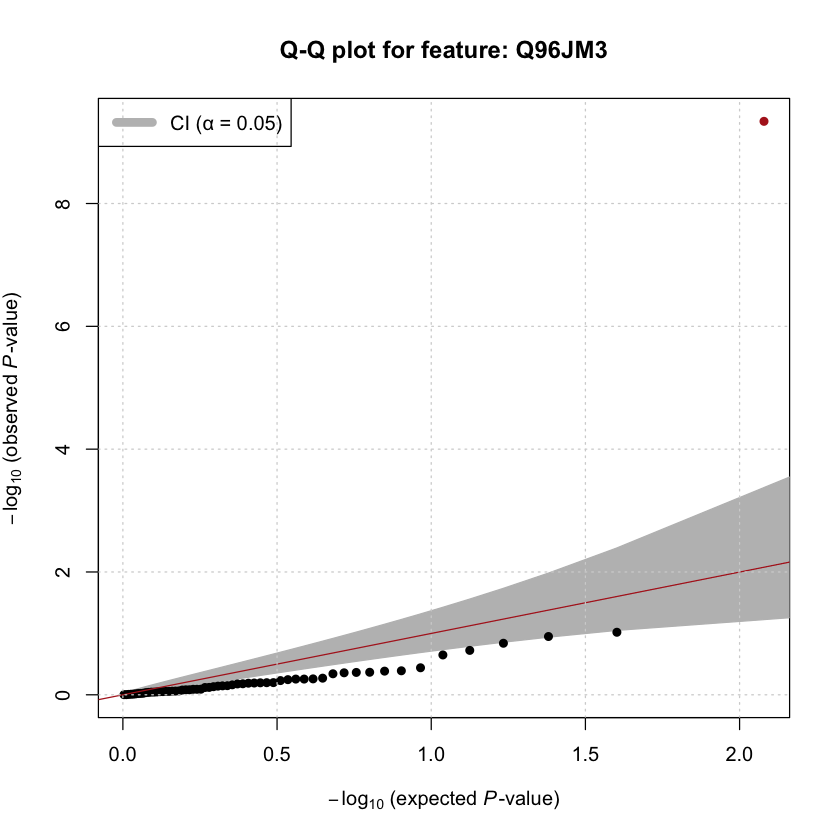

In [16]:
# The quantile-quantile plot can be used to see whether the fit converged well. 
# In presence of an outlier, it can happen that most of the points end up below the confidence band. 
# This is fine and indicates that we have conservative P-values for the other points. 
# QQ-plot for a given protein
plotQQ(outrider_ds, "Q96JM3") 

Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”


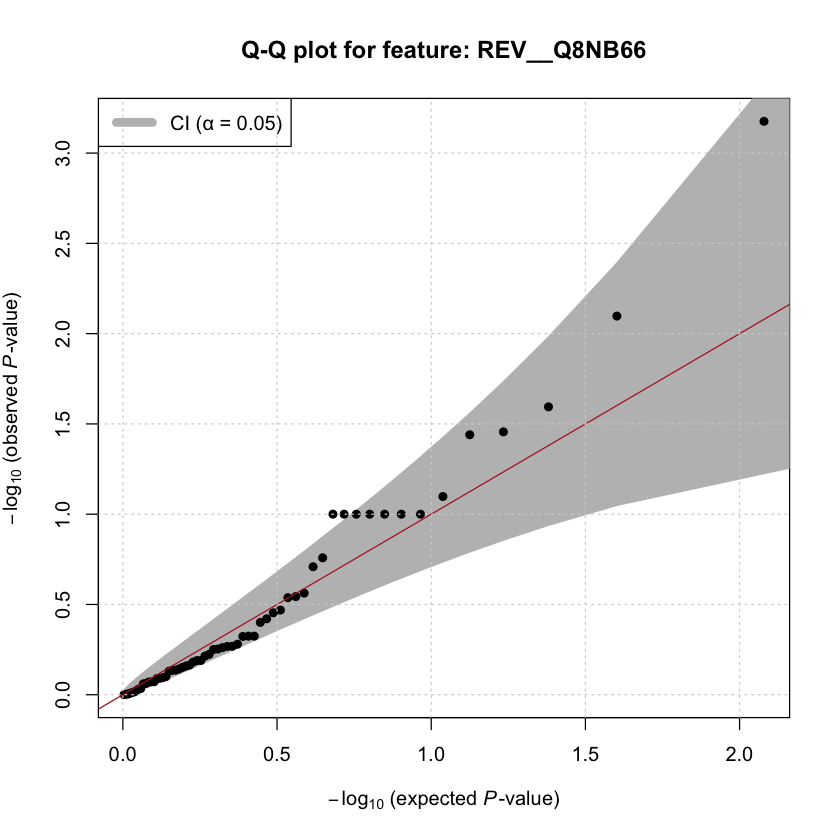

In [17]:
plotQQ(outrider_ds, "REV__Q8NB66") 

Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <ce>”
Warning message in text.default(x, y, ...):
“Konvertierungsfehler für 'CI (α = 0.05)' in 'mbcsToSbcs': Punkt ersetzt <b1>”


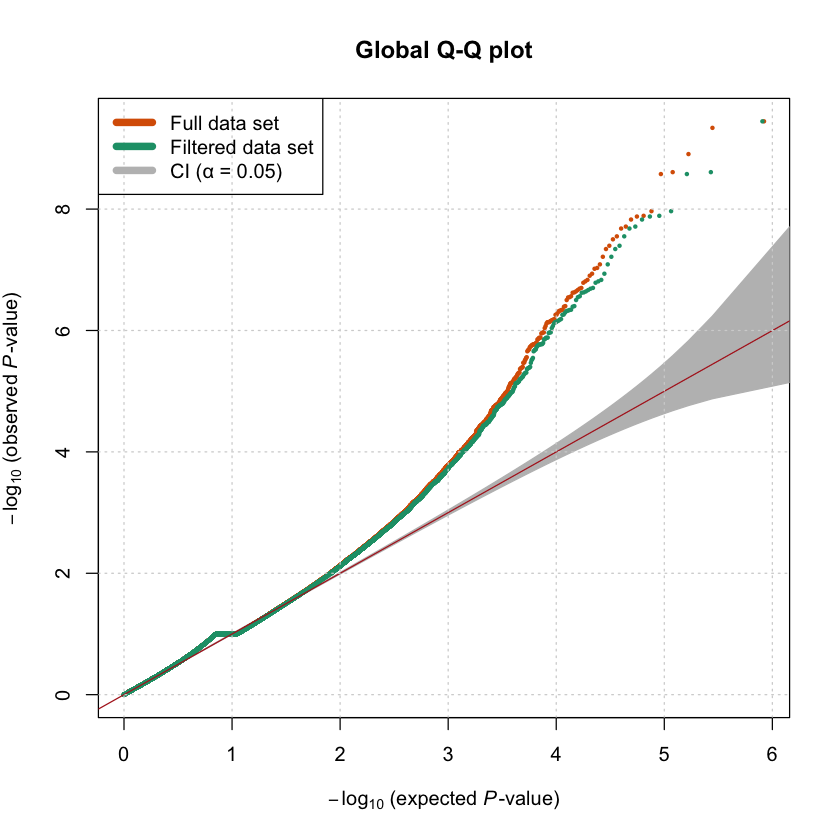

In [18]:
plotQQ(outrider_ds, global = TRUE) 

In [19]:
# extract fitted AE weights
E <- OUTRIDER:::E(outrider_ds) # encoder weights
D <- OUTRIDER:::D(outrider_ds) # decoder weights
b <- OUTRIDER:::b(outrider_ds) # bias, originally initialized as mean(log.intensity) per protein

In [20]:
# recompute AE predictions without NA
x0 <- preprocessed(outrider_ds) # input values in log space
b0 <- rowMeans(x0, na.rm=TRUE)
x <- t(x0 - b0) # input to the AE, values are centered
x[is.na(x)] <- 0 # NAs get replaced with zeros to allow matrix multiplication
H <- x %*% E # computation of the latent space
pred_no_na <- t(H %*% D) + matrix(b, nrow=nrow(outrider_ds), ncol=ncol(outrider_ds)) # decode from latent space with decoder weights and bias

In [21]:
rownames(pred_no_na) <- rownames(outrider_ds)
head(pred_no_na)
nrow(pred_no_na)

,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,23.82530,24.89250,23.46536,24.26511,24.99417,25.46808,23.91395,25.65536,23.57569,24.38698,⋯,25.54598,26.19636,22.81692,24.31618,25.50504,25.56392,23.95363,25.12832,25.17307,25.84836
A0AV96;A0AV96-2,26.95893,28.67702,29.12149,29.22591,24.08905,27.47051,22.85227,32.45874,28.00763,29.90481,⋯,25.51139,25.44076,26.48217,28.93228,29.98096,28.86376,26.97917,26.17529,25.60923,25.94243
A0AVF1;A0AVF1-2;A0AVF1-3,23.77847,24.47958,23.40375,26.09918,24.29845,24.66992,25.21604,24.20237,24.03991,23.12396,⋯,25.57966,25.25518,26.65104,25.98517,23.99013,24.89343,25.10870,25.50019,24.60681,24.27626
A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,31.90762,31.70965,31.41251,32.39082,31.29363,32.02402,31.57607,31.04223,31.72583,31.25707,⋯,31.48502,31.35044,31.52994,31.32385,31.54180,32.04987,31.81649,31.61414,30.10508,30.35830
A0FGR8-6;A0FGR8,29.53564,26.32843,26.11850,24.78599,26.70081,25.57264,27.98287,27.27502,26.03777,27.61926,⋯,26.92745,26.57684,28.59774,26.38374,25.82347,25.27722,26.00291,25.33322,26.35553,24.34689
A0JLT2;A0JLT2-2,24.02672,25.56828,26.18665,24.93679,25.16909,25.26828,26.73343,25.75000,25.72822,25.16022,⋯,25.08475,24.77894,25.33499,25.66370,26.69872,24.44849,25.86691,25.13800,25.44573,25.14074


[1] 6975

In [22]:
write.table(pred_no_na, "pred_no_na.txt", row.names = TRUE)

In [23]:
res <- results(outrider_ds, all = TRUE)

In [24]:
write.table(res, "outrider_res.txt", row.names = TRUE)

In [25]:
# plot for hyper-parameter optimazation
library(dplyr)
library(ggplot2)

number <- c(3,4,5,6,7,8,9,10,12,13,15,17,20)
endoc_f <- c(0.0,0.5,1.0)

encod_dim <- rep(number, each=3)

num <- length(encod_dim)
noice_factor  <- rep(endoc_f, times=num/3, each=1)

prec_rec <- c(0.117340,
              0.117340,
              0.117391,
              0.117345,
              0.118319,
              0.118359,
              0.118115,
              0.118138,
              0.118217,
              0.119884,
              0.119973,
              0.119568,
              0.119807,
              0.119807,
              0.120970,
              0.129179,
              0.129221,
              0.129020,
              0.129781,
              0.129499,
              0.129785,
              0.130128,
              0.130324,
              0.129944,
              0.135832,
              0.135517,
              0.134839,
              0.135588,
              0.135242,
              0.136288,
              0.136370,
              0.137169,
              0.139956,
              0.138798,
              0.137209,
              0.141131,
              0.132473,
              0.130786,
              0.134723)
report_pre_rec <- data.frame("encod_dim" = encod_dim, "noise_factor" = noice_factor %>% as.character(), "prec_rec" = prec_rec)

write.table(report_pre_rec, "report_pre_rec_original.txt",sep = "\t",quote = F, row.names = F,col.names = T)


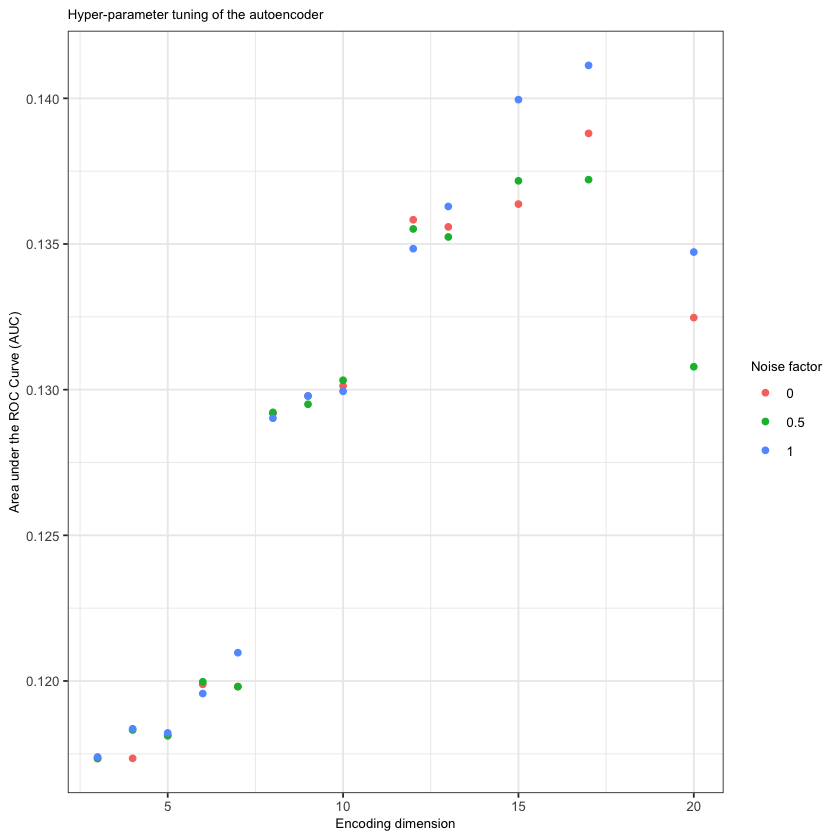

In [26]:
report_pre_rec_plot <- ggplot(report_pre_rec, aes(encod_dim,prec_rec))+
  geom_point(aes(color= noise_factor), size=1.5)+ theme_bw() + 
  xlab("Encoding dimension") + ylab("Area under the ROC Curve (AUC)") + 
  ggtitle("Hyper-parameter tuning of the autoencoder")+
   theme(plot.title = element_text(size = 8),
         axis.text.x = element_text(size = 8),
         axis.title.x = element_text(size = 8),
         axis.title.y = element_text(size = 8),
         axis.text.y = element_text(size = 8),
         legend.title=element_text(size=8),
         legend.text=element_text(size=8))  + labs(color='Noise factor') 
report_pre_rec_plot
#ggsave("report_pre_rec.png",report_pre_rec_plot, device="png", height=3.5, width=4)